In [156]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
from gensim.models import Word2Vec as w2v

model=w2v.load("Modelo2(pucio)\w2v_model.model")
def vectorizar(oracion):
    vector_palabras=[model.wv[palabra] for palabra in oracion if palabra in model.wv]
    if vector_palabras:  # Asegurar que la oración tenga al menos una palabra en el modelo
        representacion_oracion = np.mean(vector_palabras, axis=0)
        return representacion_oracion
    
def dist_cos(vectors):
    vector_1, vector_2 = vectors
    return cosine(vector_1, vector_2)

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\gonza\AppData\Local\Temp\ipykernel_6552\2765594987.py:6: SyntaxWarning: invalid escape sequence '\w'
  model=w2v.load("Modelo2(pucio)\w2v_model.model")


# Preparacion de los datos

## Arreglamos pares de noticias (verdaderos)

In [157]:
df=pd.read_csv("pares.csv")
df['identificador'] = df[['noticia_link_1', 'noticia_link_2']].values.tolist()
df.head()

,noticia_link_1,noticia_headline_1,noticia_bajada_1,noticia_antetitulo_1,noticia_cuerpo_1,noticia_dia_1,noticia_etiquetas_1,noticia_link_2,noticia_headline_2,noticia_bajada_2,noticia_antetitulo_2,noticia_cuerpo_2,noticia_dia_2,noticia_etiquetas_2,identificador
0,https://diariocorreo.pe/deportes/paolo-guerrer...,paolo guerrero revelan fecha tas anunciara dec...,delantero espera anulen sancion seis meses dopaje,Deportes,luego fifa redujera aÃ±o seis meses suspension...,2018-01-10,Paolo Guerrero,https://peru21.pe/deportes/paolo-guerrero-defi...,dara fallo tas caso paolo guerrero,resolucion tribunal arbitraje deportivo defini...,Deportes,suspenso posible absolucion castigo paolo guer...,2018-01-09,"Rusia 2018, SeleccciÃ³n peruana, TAS, Flamengo...",[https://diariocorreo.pe/deportes/paolo-guerre...
1,https://elcomercio.pe/mundo/actualidad/hondura...,honduras miles marcharon reeleccion presidencial,decenas miles personas clamaron victoria oposi...,Actualidad,autoridad electoral tardo mas tres semanas dec...,2018-01-06,"Honduras, Juan Orlando HernÃ¡ndez",https://peru21.pe/mundo/honduras-multitudinari...,honduras multitudinaria protesta reeleccion ju...,mas mil ciudadanos hondureÃ±os reclamaron triu...,Mundo,domingo desarrollo multitudinaria marcha hondu...,2018-01-06,"Honduras, Salvador Nasralla, Juan Orlando Hern...",[https://elcomercio.pe/mundo/actualidad/hondur...
2,https://diariocorreo.pe/mundo/terremoto-de-78-...,terremoto grados remece costa honduras cuba,alerta tsunami puerto rico islas virgenes desc...,Mundo,terremoto grados escala richter sacudio costa ...,2018-01-09,"Terremoto, Honduras",https://peru21.pe/mundo/honduras-produjo-terre...,terremoto magnitud sacudio honduras,foco sismico localizo km profundidad epicentro...,Mundo,costa caribe honduras produjo terremoto magnit...,2018-01-09,"Sismo, Honduras, terremoto, El Caribe",[https://diariocorreo.pe/mundo/terremoto-de-78...
3,https://elcomercio.pe/deporte-total/futbol-per...,alianza lima luis ramirez seguira matute dos t...,luis ramirez unio renovados leao butron miguel...,FÃºtbol peruano,alianza lima sigue ejecutando plan renovacione...,2018-01-03,"Alianza Lima, Luis RamÃ­rez",https://peru21.pe/deportes/luis-ramirez-renovo...,oficial luis ramirez renovo alianza lima dos t...,volante nacional estampo firma cumplira tercer...,Deportes,luego cumplir notable campaÃ±a alianza lima lo...,2018-01-03,"Alianza Lima, Luis RamÃ­rez, Twitter",[https://elcomercio.pe/deporte-total/futbol-pe...
4,https://peru21.pe/deportes/alianza-lima-hincha...,alianza lima equipo mas hinchas peru segun enc...,empresa investigacion mercados preparo informe...,Deportes,alianza lima universitario deportes clubes mas...,2018-01-06,"Alianza Lima, Sporting Cristal, Universitario ...",https://diariocorreo.pe/deportes/alianza-lima-...,alianza lima equipo mayor hinchada peru segun gfk,universitario deportes sporting cristal siguen...,Deportes,disputa equipo mas representativos primera div...,2018-01-06,"GfK, Alianza Lima, Sporting Cristal, Universit...",[https://peru21.pe/deportes/alianza-lima-hinch...


In [158]:
sum(df.noticia_etiquetas_2.isna())

0

In [159]:
df_modelo_det=df[['identificador','noticia_cuerpo_1','noticia_cuerpo_2']]
df_modelo_det['label']=True
df_modelo_det.head()

C:\Users\gonza\AppData\Local\Temp\ipykernel_6552\1706070490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo_det['label']=True


,identificador,noticia_cuerpo_1,noticia_cuerpo_2,label
0,[https://diariocorreo.pe/deportes/paolo-guerre...,luego fifa redujera aÃ±o seis meses suspension...,suspenso posible absolucion castigo paolo guer...,True
1,[https://elcomercio.pe/mundo/actualidad/hondur...,autoridad electoral tardo mas tres semanas dec...,domingo desarrollo multitudinaria marcha hondu...,True
2,[https://diariocorreo.pe/mundo/terremoto-de-78...,terremoto grados escala richter sacudio costa ...,costa caribe honduras produjo terremoto magnit...,True
3,[https://elcomercio.pe/deporte-total/futbol-pe...,alianza lima sigue ejecutando plan renovacione...,luego cumplir notable campaÃ±a alianza lima lo...,True
4,[https://peru21.pe/deportes/alianza-lima-hinch...,alianza lima universitario deportes clubes mas...,disputa equipo mas representativos primera div...,True


## Arreglamos pares de noticias (falsos)

In [160]:
comercio = pd.read_csv("../2. Procesamiento/0. Dataframes limpios/comercio_df1.txt")
correo = pd.read_csv("../2. Procesamiento/0. Dataframes limpios/correo_df1.txt")
p21 = pd.read_csv("../2. Procesamiento/0. Dataframes limpios/peru21_df1.txt")
gen=pd.concat([comercio,correo,p21],axis=0)
gen.shape

(216577, 7)

In [161]:
gen.dropna(subset=['cuerpo'], inplace=True)
gen.shape

(215554, 7)

In [162]:
##periodo de tiempo
inicio='2018-02-01'
fin='2018-02-15'
df1=gen[(gen['dia']<=fin)&(gen['dia']>=inicio)]
df1.head()

,link,headline,bajada,antetitulo,cuerpo,dia,etiquetas
39389,https://elcomercio.pe/mundial/peru-jugara-suec...,peru jugara suecia semana mundial rusia,seleccion peruana confirmo jugara amistoso sue...,Mundial,fpf concreto amistoso mas peru cara mundial ru...,2018-02-01,"Rusia 2018, Selección peruana"
39390,https://elcomercio.pe/peru/paro-agrario-panora...,paro agrario panorama regiones protestan,comuneros deandaymarca huancavelica amenazaron...,Perú,tras dos muertes dejaron ayer enfrentamientos ...,2018-02-01,"paro agrario, Junín, Huancavelica"
39391,https://elcomercio.pe/mundo/actualidad/youtube...,youtuber logan paul ironicamente dicen suicide,bloguero estadounidense recordado polemico vid...,Actualidad,vez mas polemico youtuber logan paul pronuncia...,2018-02-01,"Logan Paul, YouTube"
39392,https://elcomercio.pe/tecnologia/ciencias/rusi...,fenomeno hizo subieran grados siberia,fenomeno precedentes hizo temperatura siberia ...,NaN,hace unas semanas informabamos bbc mundo vida ...,2018-02-01,"Rusia, Ciencias, BBC"
39393,https://elcomercio.pe/tvmas/series/dragon-ball...,dragon ball super revela sinopsis episodio,revista especializada comparte informacion enc...,Series,acera final dragon ball super torneo poder tod...,2018-02-01,"Dragon Ball, Dragon Ball Super"


In [163]:
df_false=df1[['link','cuerpo']]
df_false.shape

(4901, 2)

In [164]:
inicio='2017-02-01'
fin='2017-02-15'
df1=gen[(gen['dia']<=fin)&(gen['dia']>=inicio)]
df1.head()

,link,headline,bajada,antetitulo,cuerpo,dia,etiquetas
2995,https://elcomercio.pe/politica/congreso/grupo-...,grupo congreso aprueba segundo paquete decretos,subgrupo comision constitucion aprobo informes...,Congreso,grupo comision constitucion congreso viene rev...,2017-02-01,Facultades legislativas
2996,https://elcomercio.pe/politica/congreso/grupo-...,grupo congreso aprueba segundo paquete decretos,subgrupo comisi oacute n constituci oacute n a...,Política,grupo comisin constitucin congreso viene revis...,2017-02-01,Facultades legislativas
2997,https://elcomercio.pe/lima/nueva-crecida-rio-h...,nueva crecida rio huaycoloro causo alarma vecinos,entrada campoy cerrada policia pidieron reside...,Lima,nueva crecida rio huaycoloro causo alarma veci...,2017-02-01,Río Huaycoloro
2998,https://elcomercio.pe/mundo/eeuu/musulmanes-pr...,musulmanes protestaron donald trump frente cap...,protesta encabezada khizr khan perdio hijo gue...,EEUU,khizr khan musulman perdio hijo guerra irak pa...,2017-02-01,"Estados Unidos, Donald Trump"
2999,https://elcomercio.pe/lima/minsa-lima-callao-h...,minsa lima callao mil niños anemia,pais niños menores años padecen anemia,Lima,ministerio salud advirtio lima metropolitana c...,2017-02-01,"Anemia, Ministerio de Salud"


In [165]:
df_false1=df1[['link','cuerpo']]
df_false1 = df_false1.rename(columns={'link': 'noticia_link_2', 'cuerpo': 'noticia_cuerpo_2'})
df_false1.reset_index(inplace=True)
df_false1.drop('index',axis=1,inplace=True)
df_false1.shape[0]

3746

In [166]:
df_false = df_false.rename(columns={'link': 'noticia_link_1', 'cuerpo': 'noticia_cuerpo_1'})
df_false.reset_index(inplace=True)
df_false.drop('index',axis=1,inplace=True)
df_false=df_false[:df_false1.shape[0]]
df_false=pd.concat([df_false,df_false1],axis=1)
df_false.dropna(inplace=True)
df_false.shape

(3746, 4)

In [167]:
df_false['identificador'] = df_false[['noticia_link_1', 'noticia_link_2']].values.tolist()
df_false.drop(['noticia_link_1','noticia_link_2'],axis=1,inplace=True)
df_false['label']=False
df_false.head()

,noticia_cuerpo_1,noticia_cuerpo_2,identificador,label
0,fpf concreto amistoso mas peru cara mundial ru...,grupo comision constitucion congreso viene rev...,[https://elcomercio.pe/mundial/peru-jugara-sue...,False
1,tras dos muertes dejaron ayer enfrentamientos ...,grupo comisin constitucin congreso viene revis...,[https://elcomercio.pe/peru/paro-agrario-panor...,False
2,vez mas polemico youtuber logan paul pronuncia...,nueva crecida rio huaycoloro causo alarma veci...,[https://elcomercio.pe/mundo/actualidad/youtub...,False
3,hace unas semanas informabamos bbc mundo vida ...,khizr khan musulman perdio hijo guerra irak pa...,[https://elcomercio.pe/tecnologia/ciencias/rus...,False
4,acera final dragon ball super torneo poder tod...,ministerio salud advirtio lima metropolitana c...,[https://elcomercio.pe/tvmas/series/dragon-bal...,False


## DF completo

In [168]:
df_modelo_completo=pd.concat([df_modelo_det,df_false[:df_modelo_det.shape[0]]],axis=0)
df_modelo_completo.head(-5)

,identificador,noticia_cuerpo_1,noticia_cuerpo_2,label
0,[https://diariocorreo.pe/deportes/paolo-guerre...,luego fifa redujera aÃ±o seis meses suspension...,suspenso posible absolucion castigo paolo guer...,True
1,[https://elcomercio.pe/mundo/actualidad/hondur...,autoridad electoral tardo mas tres semanas dec...,domingo desarrollo multitudinaria marcha hondu...,True
2,[https://diariocorreo.pe/mundo/terremoto-de-78...,terremoto grados escala richter sacudio costa ...,costa caribe honduras produjo terremoto magnit...,True
3,[https://elcomercio.pe/deporte-total/futbol-pe...,alianza lima sigue ejecutando plan renovacione...,luego cumplir notable campaÃ±a alianza lima lo...,True
4,[https://peru21.pe/deportes/alianza-lima-hinch...,alianza lima universitario deportes clubes mas...,disputa equipo mas representativos primera div...,True
...,...,...,...,...
478,[https://elcomercio.pe/economia/mercados/wall-...,principales indices wall street volvian caer v...,niña año medio edad fallecio ultimo viernes tr...,False
479,[https://elcomercio.pe/gastronomia/peruana/imp...,primos chicken bar queda antiguamente mediterr...,deporte mundial muchas situaciones curiosas mu...,False
480,[https://elcomercio.pe/politica/caso-madre-mia...,comision madre mia congreso aprobo solicitar p...,deporte mundial muchas situaciones curiosas mu...,False
481,[https://elcomercio.pe/luces/cine/black-panthe...,pocas veces pelicula superheroes mezcla manera...,iconografia cristiana llego peru siglo xvi ima...,False


In [169]:
df_truers = df_modelo_completo[df_modelo_completo['label'] == True]
df_fakes = df_modelo_completo[df_modelo_completo['label'] == False]

df_train_truers = df_truers.sample(frac=0.8, random_state=42)
df_train_fakes = df_fakes.sample(frac=0.8, random_state=42)

df_train = pd.concat([df_train_truers, df_train_fakes])

df_test = df_modelo_completo.drop(df_train.index)
df_test

,identificador,noticia_cuerpo_1,noticia_cuerpo_2,label
1,[https://elcomercio.pe/mundo/actualidad/hondur...,autoridad electoral tardo mas tres semanas dec...,domingo desarrollo multitudinaria marcha hondu...,True
13,[https://peru21.pe/lima/sismo-3-8-escala-richt...,sismo grados escala richter sintio noche lima ...,movimiento telurico grados intensidad registro...,True
20,[https://elcomercio.pe/deporte-total/futbol-mu...,manchester united derroto stoke city ultimo pa...,manchester united goleo stoke city lunes old t...,True
21,[https://diariocorreo.pe/espectaculos/brunella...,agarrate brunella horna nueva fotografia congr...,richard acuÃ±a marisa glave aparecieron nuevam...,True
34,[https://diariocorreo.pe/mundo/hombres-mujeres...,martes islandia convirtio primer pais mundo le...,favor equidad genero islandia prohibio brecha ...,True
...,...,...,...,...
470,[https://elcomercio.pe/mundo/mexico-cayo-z43-p...,plena polemica posible presencia carteles ciud...,programa television estadounidense americas mo...,False
476,[https://elcomercio.pe/peru/10-regiones-pais-s...,total ciudades pais soportan hoy radiacion ult...,marco segunda fecha torneo verano alianza lima...,False
480,[https://elcomercio.pe/politica/caso-madre-mia...,comision madre mia congreso aprobo solicitar p...,deporte mundial muchas situaciones curiosas mu...,False
484,[https://elcomercio.pe/luces/musica/instagram-...,pablo holman miembro banda chilena kudai infor...,dias singular agitacion oficinas vivacolombia ...,False


In [170]:
links_brr=df_test['identificador']
links_test=[]
for i in links_brr:
    links_test.extend(i)
links_test=set(links_test)
len(links_test)

385

# Elaboracion del vectorizador

In [171]:
sentences=list(gen[~gen['link'].isin(links_test)]['cuerpo'])
sentences=[s.split() for s in sentences]

In [172]:
# # Parámetros del modelo
# vector_size = 100
# window = 5
# min_count = 5
# workers = 6
# negative = 1
# sg=1
# epochs = 5

# # Entrenar el modelo
# model = w2v(sentences, vector_size=vector_size, sg=sg,negative=negative, window=window, epochs= epochs, min_count=min_count, workers=workers)

# # Guardar el modelo entrenado
# model.save("MLP_class.model")

model=w2v.load("MLP_class.model")

### Representacion w2v basica

Agrego los vectores

In [177]:
df_train['vector1']=df_train['noticia_cuerpo_1'].apply(vectorizar)
df_train['vector2']=df_train['noticia_cuerpo_2'].apply(vectorizar)

# Concatenar los vectores
df_train['vector'] = df_train.apply(lambda row: np.concatenate([row['vector1'], row['vector2']]), axis=1)
df_train['distancia']=df_train.apply(lambda row: dist_cos([row['vector1'],row['vector2']]),axis=1)
df_train.drop(['vector1','vector2'],axis=1,inplace=True)# 

In [178]:
df_train.head()

,identificador,noticia_cuerpo_1,noticia_cuerpo_2,label,vector,distancia
72,[https://diariocorreo.pe/deportes/ver-en-vivo-...,verdugo sudamericanos equipo frances dirigido ...,francia aseguro pase semifinales mundial viern...,True,"[0.064652264, 0.25634626, -0.082605846, 0.1362...",1.501619e-04
244,[https://elcomercio.pe/tvmas/hollywood/guardia...,actor kurt russell brindo opinion despido jame...,actor kurt russell tambien brindo opinion desp...,True,"[0.07562276, 0.25131318, -0.075801015, 0.14649...",5.624827e-06
437,[https://peru21.pe/espectaculos/yola-polastri-...,yola polastri operada recientemente debido ane...,animadora infantil yola polastri anuncio trave...,True,"[0.09138296, 0.2628395, -0.07502493, 0.1501642...",1.585988e-03
79,[https://diariocorreo.pe/deportes/ver-en-vivo-...,croacia vencio inglaterra alargue semifinales ...,croacia accedio primera vez historia final cop...,True,"[0.060575068, 0.2553576, -0.07980658, 0.157174...",5.806676e-04
402,[https://elcomercio.pe/economia/mundo/comunida...,carlos nacio mexico hace decada decidio empren...,carlos nacio mexico hace decada decidio empren...,True,"[0.05804597, 0.2605, -0.08971433, 0.13085501, ...",8.129076e-07


In [179]:
df_test['vector1']=df_test['noticia_cuerpo_1'].apply(vectorizar)
df_test['vector2']=df_test['noticia_cuerpo_2'].apply(vectorizar)

# Concatenar los vectores
df_test['vector'] = df_test.apply(lambda row: np.concatenate([row['vector1'], row['vector2']]), axis=1)
df_test['distancia']=df_test.apply(lambda row: dist_cos([row['vector1'],row['vector2']]),axis=1)
df_test.drop(['vector1','vector2'],axis=1,inplace=True)

In [180]:
df_test.head()

,identificador,noticia_cuerpo_1,noticia_cuerpo_2,label,vector,distancia
1,[https://elcomercio.pe/mundo/actualidad/hondur...,autoridad electoral tardo mas tres semanas dec...,domingo desarrollo multitudinaria marcha hondu...,True,"[0.06686157, 0.25668865, -0.0782634, 0.1389976...",0.000303
13,[https://peru21.pe/lima/sismo-3-8-escala-richt...,sismo grados escala richter sintio noche lima ...,movimiento telurico grados intensidad registro...,True,"[0.05304357, 0.23240991, -0.09670417, 0.152483...",0.003547
20,[https://elcomercio.pe/deporte-total/futbol-mu...,manchester united derroto stoke city ultimo pa...,manchester united goleo stoke city lunes old t...,True,"[0.07060909, 0.24565835, -0.083805285, 0.15367...",0.001055
21,[https://diariocorreo.pe/espectaculos/brunella...,agarrate brunella horna nueva fotografia congr...,richard acuÃ±a marisa glave aparecieron nuevam...,True,"[0.043079082, 0.2721256, -0.092024565, 0.12813...",0.001021
34,[https://diariocorreo.pe/mundo/hombres-mujeres...,martes islandia convirtio primer pais mundo le...,favor equidad genero islandia prohibio brecha ...,True,"[0.069632426, 0.25835553, -0.08782846, 0.13231...",0.001808


### K-means (clusterizacion)

In [222]:
from sklearn.cluster import KMeans
from collections import Counter

words=set(model.wv.key_to_index)
w_arr=np.array([model.wv[w] for w in words])


In [223]:
def k_coso(corpus):
    corpus=corpus.split()

    count={}
    for k,v in Counter(corpus).items():
        if k in words:
            count[mapeo.get(k)]=count.get(mapeo.get(k),0)+v
    vector=np.zeros(num_clusters)
    for k,v in count.items():
        vector[k]=v
    return vector

In [224]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(w_arr)
labels=kmeans.labels_
mapeo={}
for i,w in enumerate(words):
    mapeo[w]=labels[i]

### Representacion w2v cluster

In [225]:
df_train['kvector_1']=df_train['noticia_cuerpo_1'].apply(k_coso)
df_train['kvector_2']=df_train['noticia_cuerpo_2'].apply(k_coso)


df_train['kvector'] = df_train.apply(lambda row: np.concatenate([row['kvector_1'], row['kvector_2']]), axis=1)
df_train.drop(['kvector_1','kvector_2'],axis=1,inplace=True)# 

In [226]:
df_test['kvector_1']=df_test['noticia_cuerpo_1'].apply(k_coso)
df_test['kvector_2']=df_test['noticia_cuerpo_2'].apply(k_coso)


df_test['kvector'] = df_test.apply(lambda row: np.concatenate([row['kvector_1'], row['kvector_2']]), axis=1)
df_test.drop(['kvector_1','kvector_2'],axis=1,inplace=True)# 

# Modelos de Clasificacion

In [227]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

## Modelo (MLP) - w2v puro

In [228]:
X_train_vectors = np.vstack(df_train['vector'])
X_test_vectors = np.vstack(df_test['vector'])

X_train_distance = np.array(df_train['distancia']).reshape(-1, 1)
X_test_distance = np.array(df_test['distancia']).reshape(-1, 1)

X_train = np.hstack([X_train_vectors, X_train_distance])
X_test = np.hstack([X_test_vectors, X_test_distance])

y_train = df_train['label'].values
y_test = df_test['label'].values

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y configurar el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, ),  # Dos capas ocultas con 100 y 50 neuronas
                    activation='relu',             # Función de activación ReLU
                    solver='sgd',                 # Optimizador Adam
                    max_iter=1000,                 # Número máximo de iteraciones
                    random_state=42,
                    learning_rate='constant',
                    alpha=0.0001)

# Entrenar el modelo
mlp.fit(X_train_scaled, y_train)

# Evaluar el modelo
score = mlp.score(X_train_scaled, y_train)
print(f"[TRAIN]Precisión del modelo: {score:.2f}")
score = mlp.score(X_test_scaled, y_test)
print(f"[TEST]Precisión del modelo: {score:.2f}")

[TRAIN]Precisión del modelo: 1.00
[TEST]Precisión del modelo: 0.82


c:\Users\gonza\OneDrive - Universidad del Pacífico\Material\Ciclo VIII\Analitica de la web\Proy-Ana\ProyAna\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Precision para Parejas: 0.80
Precision para Vuelveporfa: 0.83


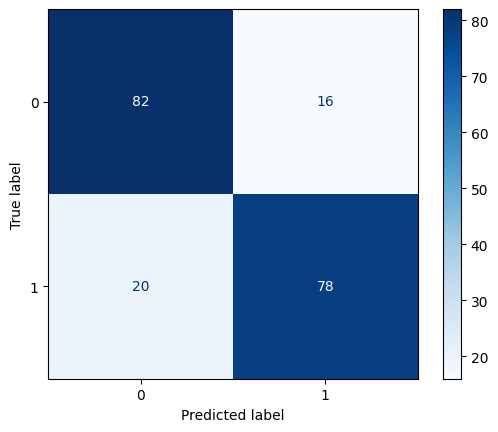

In [229]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score
import matplotlib.pyplot as plt

y_true = y_test
y_pred = mlp.predict(X_test_scaled)
cm = confusion_matrix(y_true, y_pred)

precision = precision_score(y_true, y_pred, average=None)
for label, prec in zip(["Parejas", "Vuelveporfa"], precision):
    print(f"Precision para {label}: {prec:.2f}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Modelo (MLP) - w2v kmeans

In [230]:
X_train_vectors = np.vstack(df_train['kvector'])
X_test_vectors = np.vstack(df_test['kvector'])

y_train = df_train['label'].values
y_test = df_test['label'].values

from sklearn.preprocessing import normalize
X_train = normalize(X_train_vectors, norm='l2')
X_test = normalize(X_test_vectors, norm='l2')



In [237]:
# Crear y configurar el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 100),  # Dos capas ocultas con 100 y 50 neuronas
                    activation='relu',             # Función de activación ReLU
                    solver='adam',                 # Optimizador Adam
                    max_iter=1000,                 # Número máximo de iteraciones
                    random_state=42,
                    learning_rate='constant',
                    alpha=0.0001)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Evaluar el modelo
score = mlp.score(X_train, y_train)
print(f"[TRAIN] Precisión del modelo: {score:.2f}")
score = mlp.score(X_test, y_test)
print(f"[TEST] Precisión del modelo: {score:.2f}")

Precisión del modelo: 0.88
Precisión del modelo: 0.87


Precision para Parejas: 0.88
Precision para Vuelveporfa: 0.85


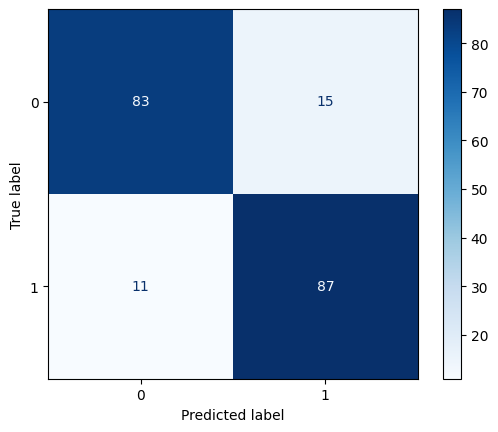

In [238]:
y_true = y_test
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_true, y_pred)

precision = precision_score(y_true, y_pred, average=None)
for label, prec in zip(["Parejas", "Vuelveporfa"], precision):
    print(f"Precision para {label}: {prec:.2f}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Busqueda de parametros

## MLP

In [211]:
X_train_vectors = np.vstack(df_train['vector'])
X_test_vectors = np.vstack(df_test['vector'])

X_train_distance = np.array(df_train['distancia']).reshape(-1, 1)
X_test_distance = np.array(df_test['distancia']).reshape(-1, 1)

X_train = np.hstack([X_train_vectors, X_train_distance])
X_test = np.hstack([X_test_vectors, X_test_distance])

y_train = df_train['label'].values
y_test = df_test['label'].values

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [236]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo
mlp = MLPClassifier(max_iter=1000, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],  # Regularización
    'learning_rate': ['constant', 'adaptive']
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ejecutar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor precisión obtenida: {grid_search.best_score_:.2f}")

# Evaluar el mejor modelo en el conjunto de prueba
best_mlp = grid_search.best_estimator_
test_score = best_mlp.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_score:.2f}")

Mejores parámetros encontrados:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}
Mejor precisión obtenida: 0.83
Precisión en el conjunto de prueba: 0.87


## k

In [208]:
precisiones_k_train=[0]*10
precisiones_k_test=[0]*10

In [210]:
for num_clusters in range(3,11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(w_arr)
    labels=kmeans.labels_
    mapeo={}
    for i,w in enumerate(words):
        mapeo[w]=labels[i]

    df_train['kvector_1']=df_train['noticia_cuerpo_1'].apply(k_coso)
    df_train['kvector_2']=df_train['noticia_cuerpo_2'].apply(k_coso)


    df_train['kvector'] = df_train.apply(lambda row: np.concatenate([row['kvector_1'], row['kvector_2']]), axis=1)
    df_train.drop(['kvector_1','kvector_2'],axis=1,inplace=True)

    df_test['kvector_1']=df_test['noticia_cuerpo_1'].apply(k_coso)
    df_test['kvector_2']=df_test['noticia_cuerpo_2'].apply(k_coso)


    df_test['kvector'] = df_test.apply(lambda row: np.concatenate([row['kvector_1'], row['kvector_2']]), axis=1)
    df_test.drop(['kvector_1','kvector_2'],axis=1,inplace=True)

    X_train_vectors = np.vstack(df_train['kvector'])
    X_test_vectors = np.vstack(df_test['kvector'])

    y_train = df_train['label'].values
    y_test = df_test['label'].values

    X_train = normalize(X_train_vectors, norm='l2')
    X_test = normalize(X_test_vectors, norm='l2')

    mlp = MLPClassifier(hidden_layer_sizes=(100, 50),  # Dos capas ocultas con 100 y 50 neuronas
                        activation='relu',             # Función de activación ReLU
                        solver='adam',                 # Optimizador Adam
                        max_iter=1000,                 # Número máximo de iteraciones
                        random_state=42)

    # Entrenar el modelo
    mlp.fit(X_train, y_train)

    # Evaluar el modelo
    score = mlp.score(X_train, y_train)
    precisiones_k_train[num_clusters-3]=score
    print(f"[TRAIN - {num_clusters}]Precisión del modelo: {score:.2f}")
    score = mlp.score(X_test, y_test)
    precisiones_k_test[num_clusters-3]=score
    print(f"[TEST - {num_clusters}]Precisión del modelo: {score:.2f}")
    print('#########################################')

[TRAIN - 3]Precisión del modelo: 0.89
[TEST - 3]Precisión del modelo: 0.85
#################
[TRAIN - 4]Precisión del modelo: 0.94
[TEST - 4]Precisión del modelo: 0.91
#################
[TRAIN - 5]Precisión del modelo: 0.98
[TEST - 5]Precisión del modelo: 0.92
#################
[TRAIN - 6]Precisión del modelo: 1.00
[TEST - 6]Precisión del modelo: 0.91
#################
[TRAIN - 7]Precisión del modelo: 1.00
[TEST - 7]Precisión del modelo: 0.89
#################
[TRAIN - 8]Precisión del modelo: 1.00
[TEST - 8]Precisión del modelo: 0.92
#################
[TRAIN - 9]Precisión del modelo: 1.00
[TEST - 9]Precisión del modelo: 0.92
#################
[TRAIN - 10]Precisión del modelo: 1.00
[TEST - 10]Precisión del modelo: 0.90
#################
